In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager


In [3]:
df_shot=pd.read_csv('shots_data/shots_openplay_head.csv')

In [4]:
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
df_no_goals=df_shot[df_shot['shot_outcome']!='Goal'].copy()

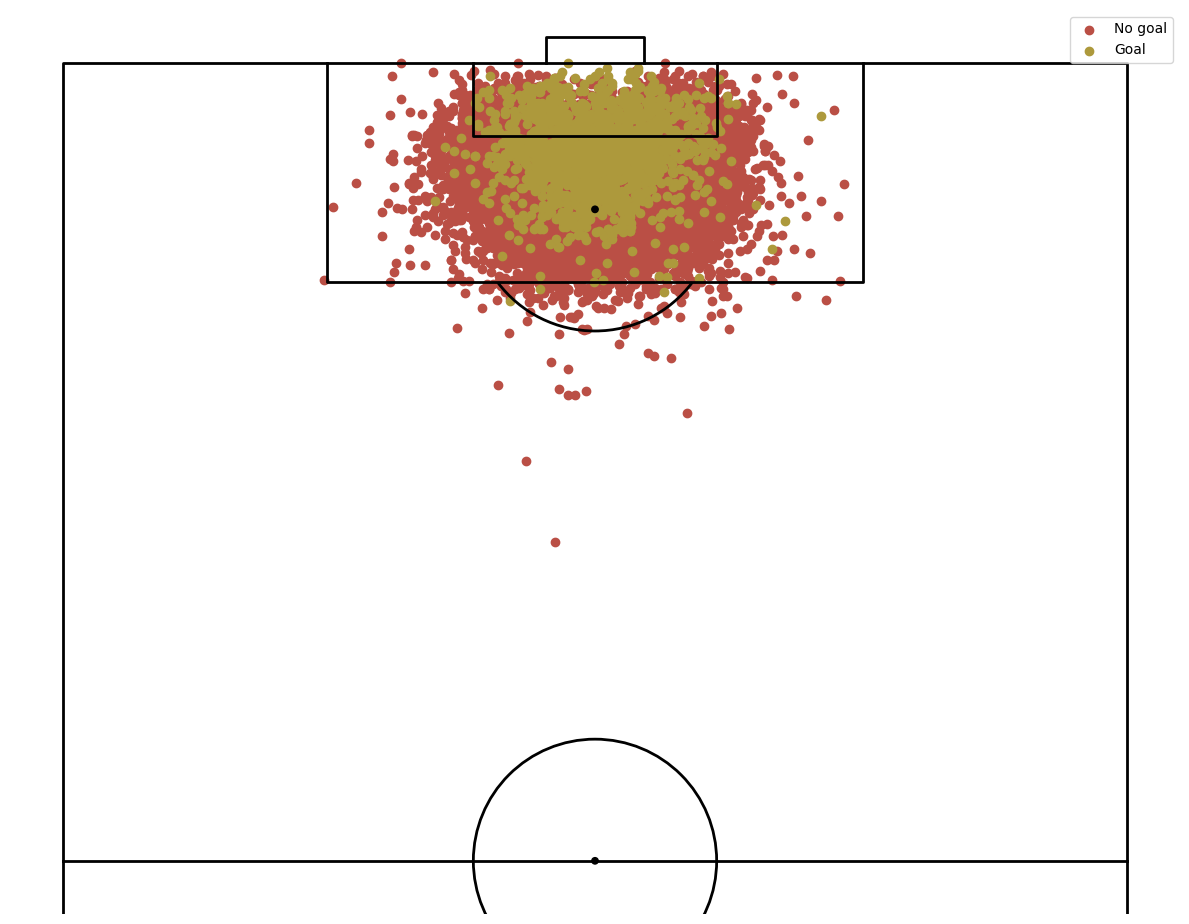

In [4]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

no_goals=pitch.scatter(
    df_no_goals['x'],df_no_goals['y'],
    c='#ba4f45', 
    marker='o',  
    ax=ax, label="No goal"
)
goals = pitch.scatter(
    df_goals['x'], df_goals['y'],
    c='#ad993c', 
    marker='o',  
    ax=ax, label="Goal" 
)

plt.legend(loc='best')
plt.show()

c:\Users\ADAM\scoop\apps\python\3.12.4\Lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


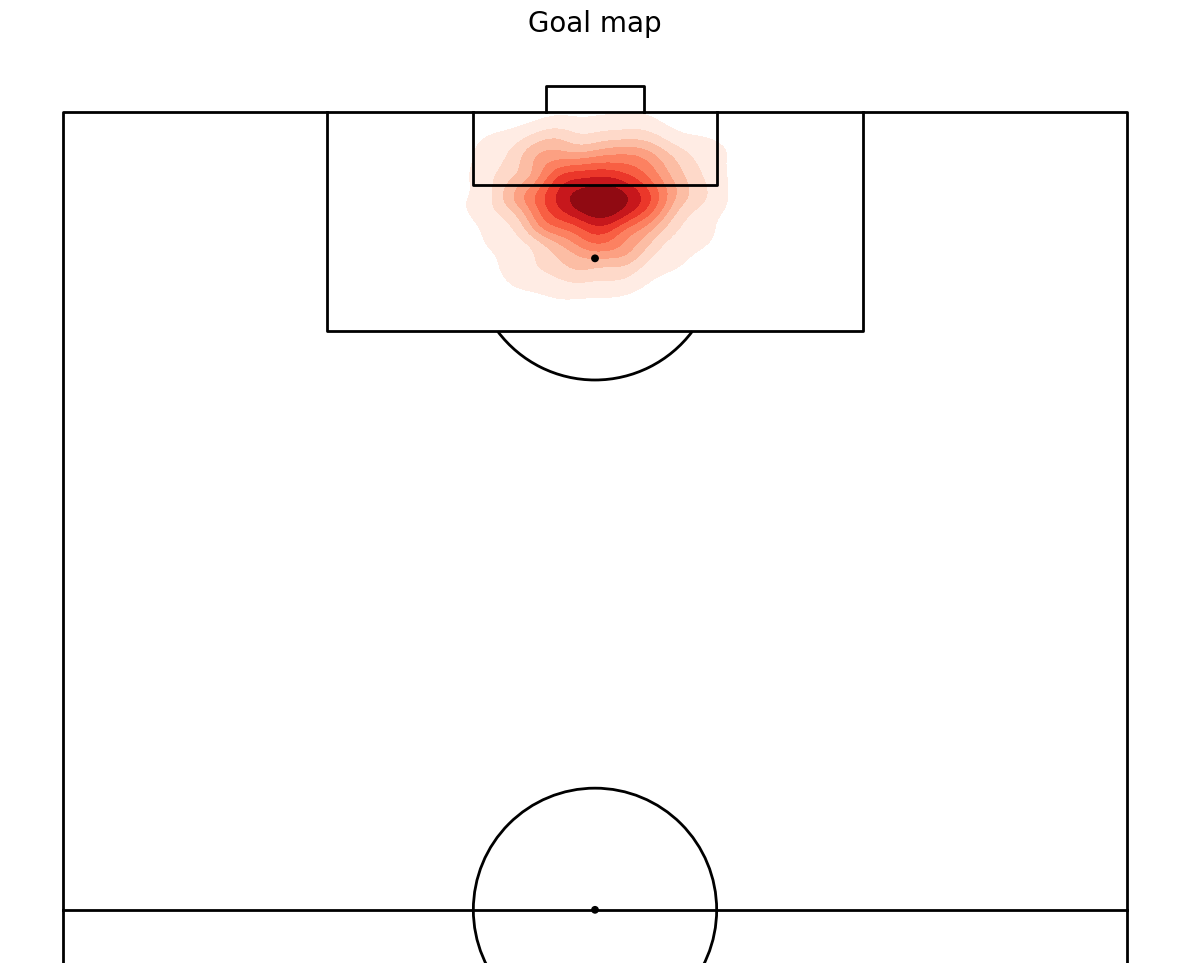

In [5]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

pitch.kdeplot(
    x=df_goals['x'],
    y=df_goals['y'],
    ax=ax,
    cmap='Reds',      
    shade=True      
)

fig.suptitle('Goal map' , fontsize = 20)
plt.show()


c:\Users\ADAM\scoop\apps\python\3.12.4\Lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


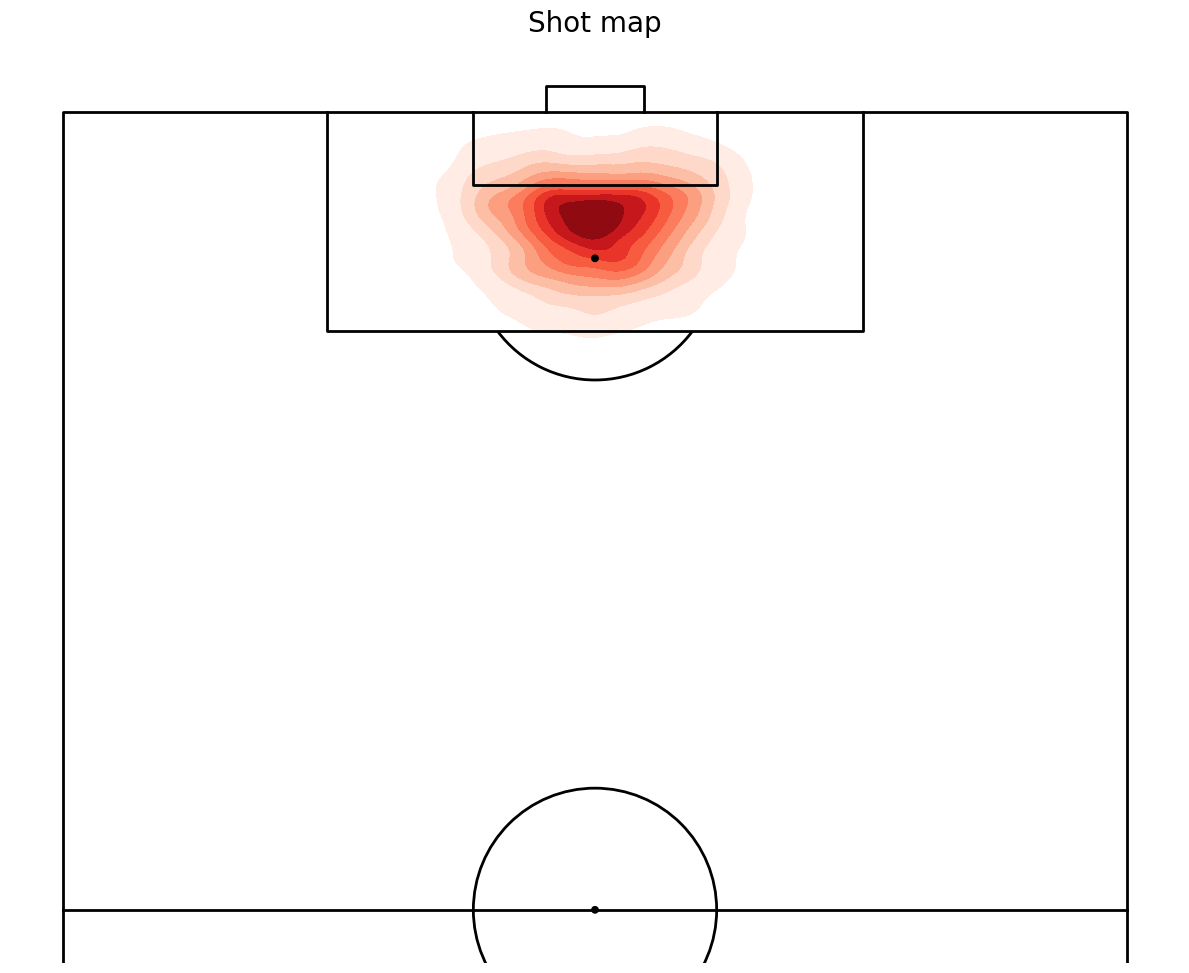

In [6]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)

fig, ax = pitch.draw(figsize=(12, 10))

pitch.kdeplot(df_shot['x'],df_shot['y'],ax=ax,cmap='Reds',shade=True)
fig.suptitle('Shot map' , fontsize = 20)
plt.show()

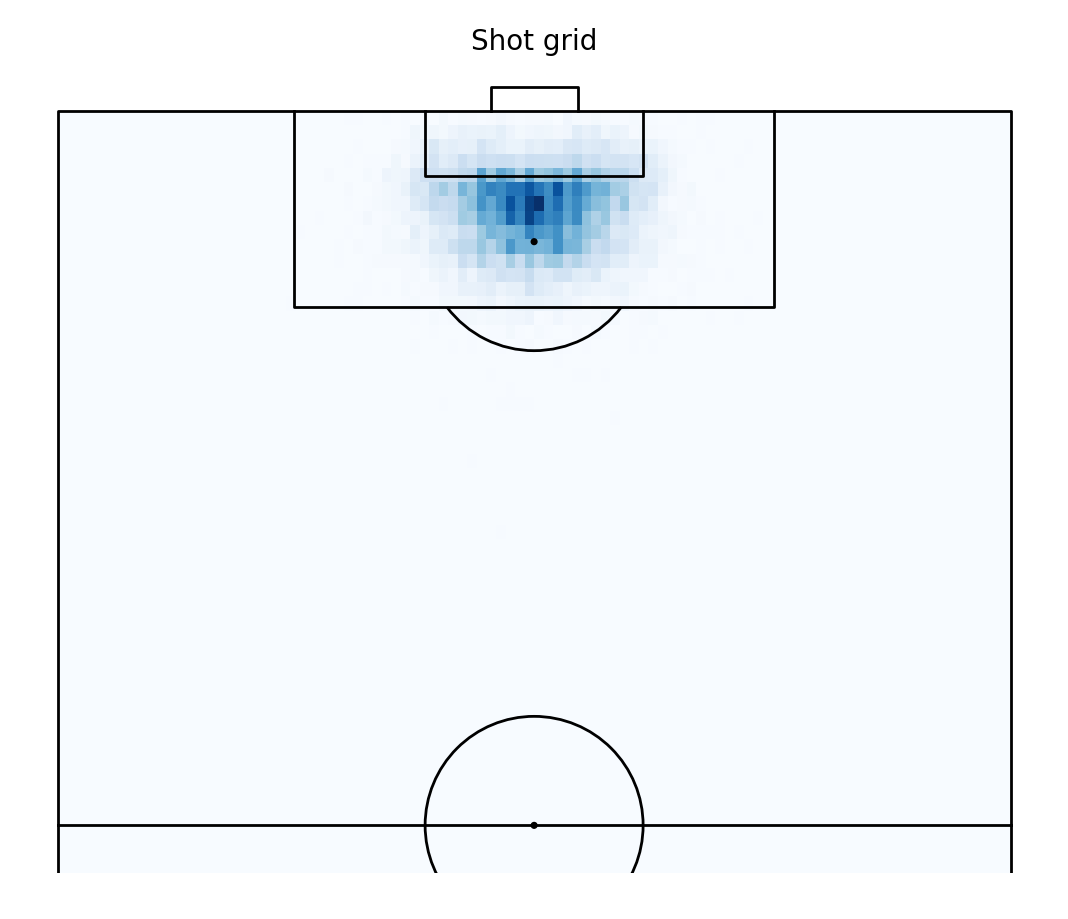

In [7]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_shots = pitch.bin_statistic(df_shot["x"], df_shot["y"], bins=100)
shot_grid = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Blues')

fig.suptitle('Shot grid' , fontsize = 20)
plt.show()


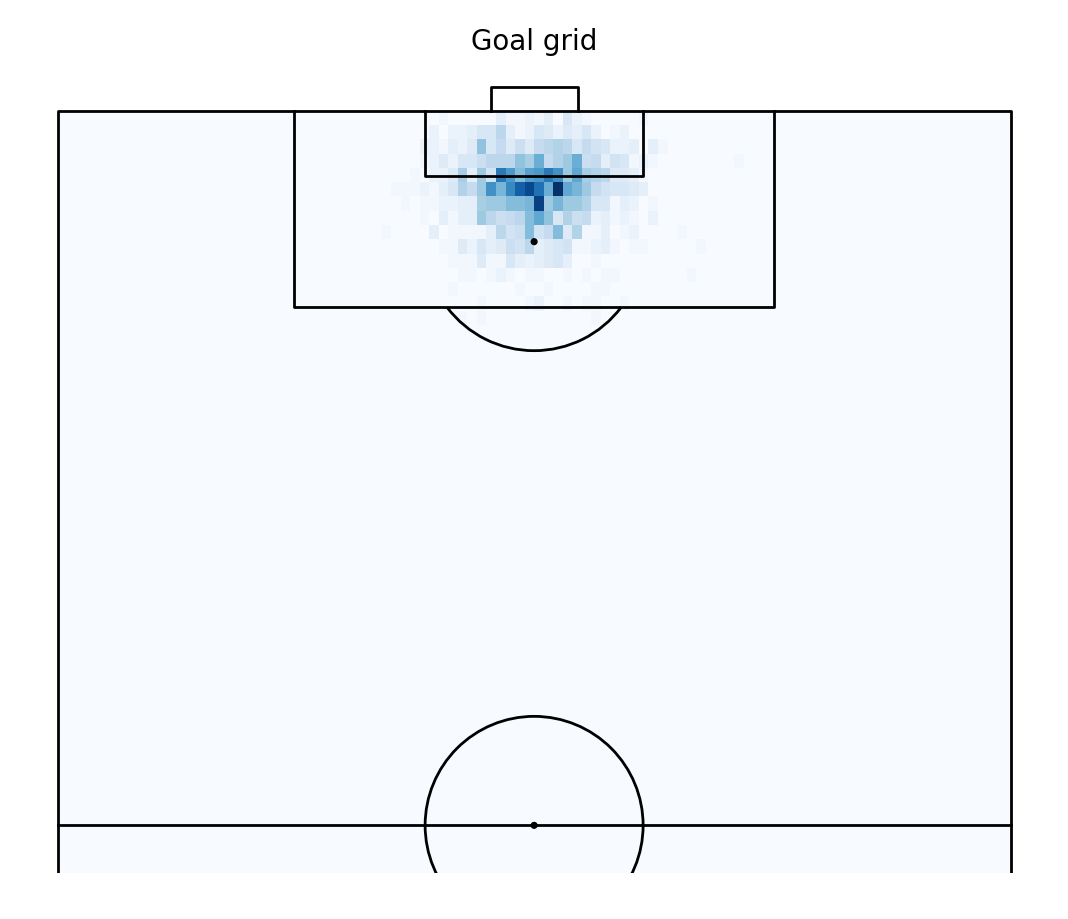

In [8]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic_goals = pitch.bin_statistic(df_goals["x"], df_goals["y"], bins=100)
shot_grid = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Blues')

fig.suptitle('Goal grid' , fontsize = 20)
plt.show()


C:\Users\ADAM\AppData\Local\Temp\ipykernel_28080\1148321986.py:6: RuntimeWarning: invalid value encountered in divide
  bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]


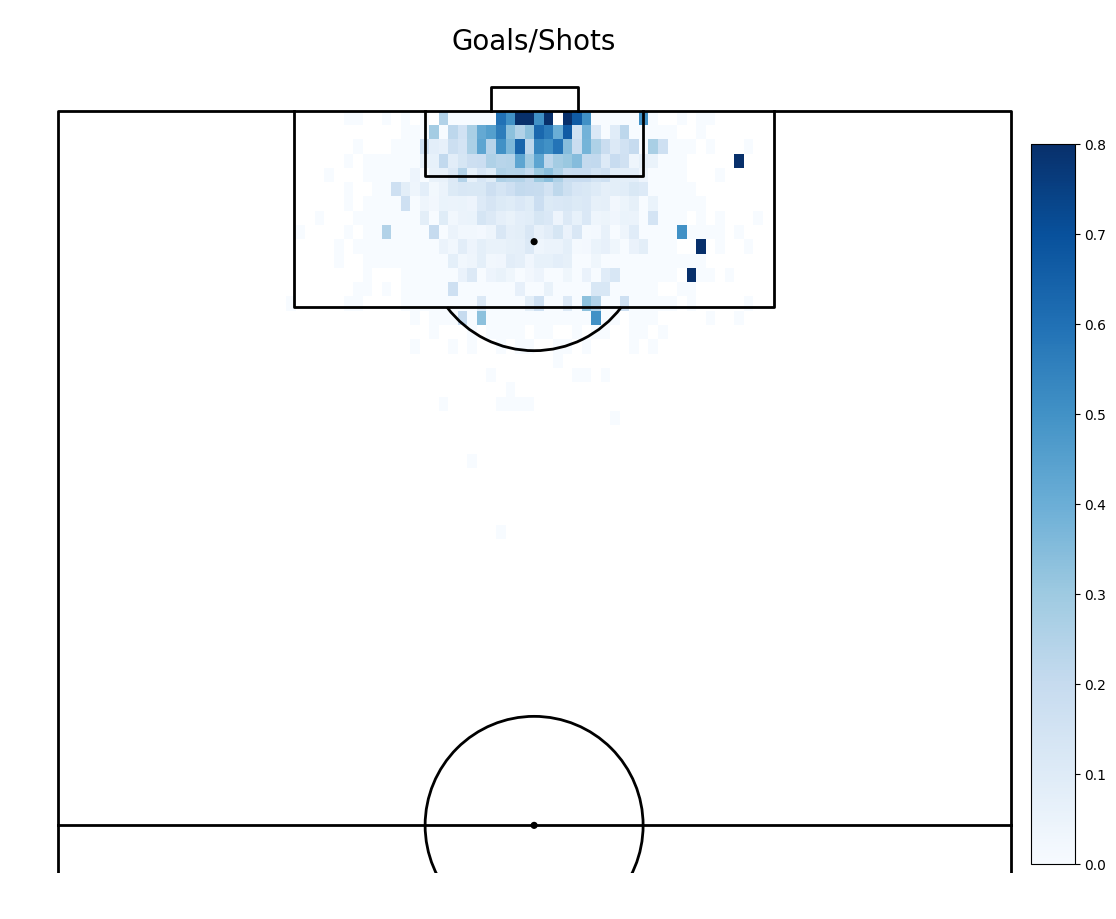

In [9]:
pitch = VerticalPitch(line_color='black',half=True, pitch_type='custom', pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(df_shot['x'], df_shot['y'], bins = 100)
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Blues', vmin = 0, vmax = 0.8)
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goals/Shots' , fontsize = 20)
plt.show()

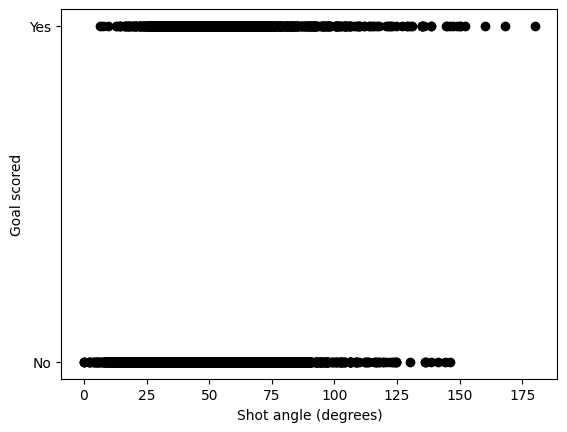

In [10]:
fig, ax = plt.subplots()
ax.plot(df_shot['angle'], df_shot['goal'], linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

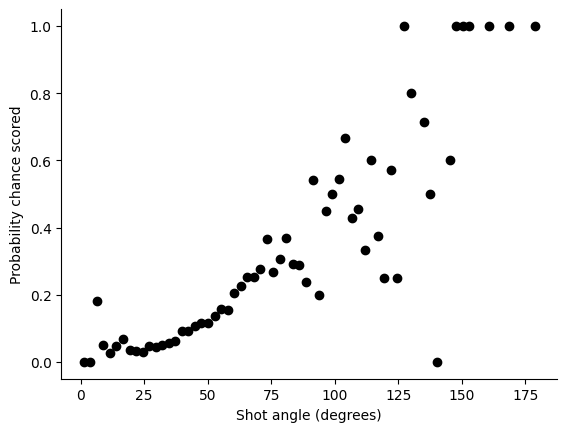

In [11]:
shotcount_ang = np.histogram(df_shot['angle'], bins=70, range=[0, 180])
df_goals=df_shot[df_shot['shot_outcome']=='Goal'].copy()
goalcount_ang = np.histogram(df_goals['angle'], bins=70, range=[0, 180])
np.seterr(divide='ignore', invalid='ignore')
prob_goal = np.divide(goalcount_ang[0], shotcount_ang[0])
angle = shotcount_ang[1]
midangle = (angle[:-1] + angle[1:])/2
fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

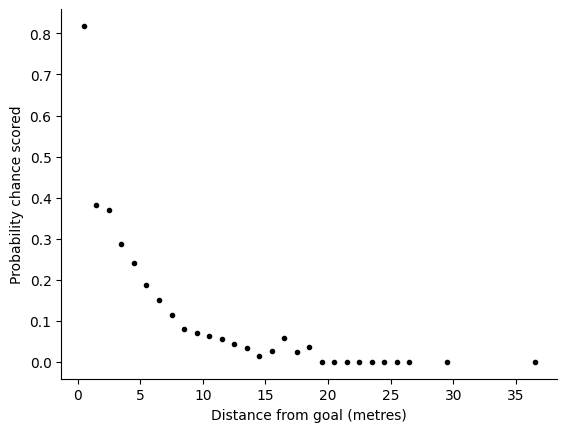

In [12]:
shotcount_dist = np.histogram(df_shot['distance'],bins=70,range=[0, 70])
goalcount_dist = np.histogram(df_goals['distance'],bins=70,range=[0, 70])
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

x = df_shot[['angle', 'distance']]
y = df_shot['goal']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)



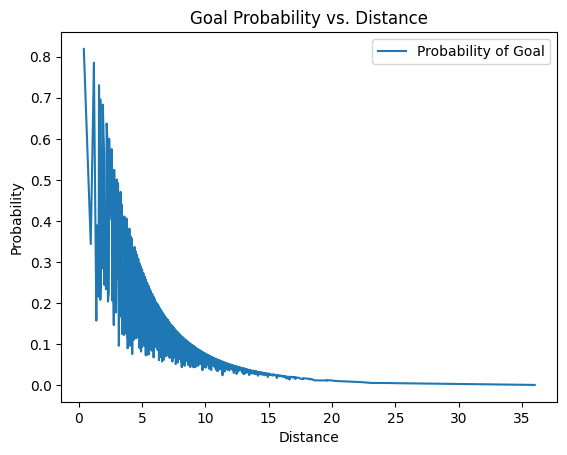

In [14]:
sorted_indices = np.argsort(x_test['distance'])
sorted_distances = x_test['distance'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices][:, 1]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("Distance")
plt.ylabel("Probability")
plt.title("Goal Probability vs. Distance")
plt.legend()
plt.show()


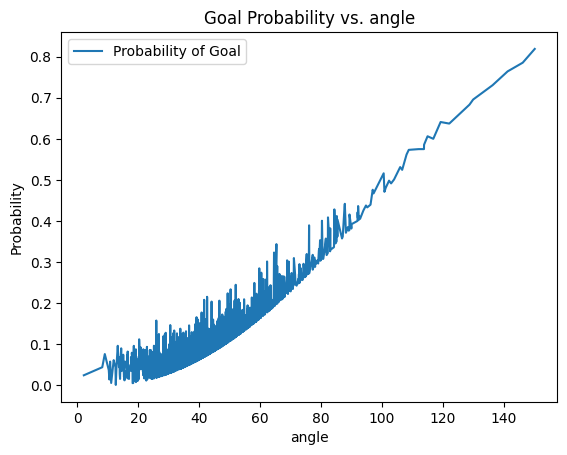

In [15]:
sorted_indices = np.argsort(x_test['angle'])
sorted_distances = x_test['angle'].iloc[sorted_indices]
sorted_probabilities = y_pred_prob[sorted_indices][:, 1]

plt.plot(sorted_distances, sorted_probabilities, label="Probability of Goal")
plt.xlabel("angle")
plt.ylabel("Probability")
plt.title("Goal Probability vs. angle")
plt.legend()
plt.show()

In [16]:
def calculateDistance(x,y):
    x_distance=120-x
    y_distance=0
    if (y<36):
        y_distance = 36-y
    elif (y>44):
        y_distance = y-44
    return np.sqrt(y_distance**2+x_distance**2)

def calculateAngle(x,y):
    g0 = [120, 44]
    p = [x, y]
    g1 = [120, 36]

    v0 = np.array(g0) - np.array(p)
    v1 = np.array(g1) - np.array(p)

    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
    return(abs(np.degrees(angle)))

def calculate_xG(x, y, model):
    distance = calculateDistance(x, y)
    angle = calculateAngle(x, y)
    x = [[angle, distance]]
    xG = model.predict_proba(x)[:, 1]

    return float(xG)



In [17]:
pitch_length=120
pitch_width=80

x_coords=np.linspace(0,pitch_length,100)
y_coords=np.linspace(0,pitch_width,100)

xG_values = []

for x in x_coords:
    for y in y_coords:
        xg = calculate_xG(x, y, model)
        xG_values.append([x, y, xg])


C:\Users\ADAM\AppData\Local\Temp\ipykernel_28080\1250207304.py:18: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
C:\Users\ADAM\AppData\Local\Temp\ipykernel_28080\1250207304.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(xG)
C:\Users\ADAM\AppData\Local\Temp\ipykernel_28080\1250207304.py:18: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
C:\Users\ADAM\AppData\Local\Temp\ipykernel_28080\1250207304.py:27: DeprecationWarning: Conversion of an array with ndim > 0

In [18]:
df_xG = pd.DataFrame(xG_values, columns=['x', 'y', 'xG'])

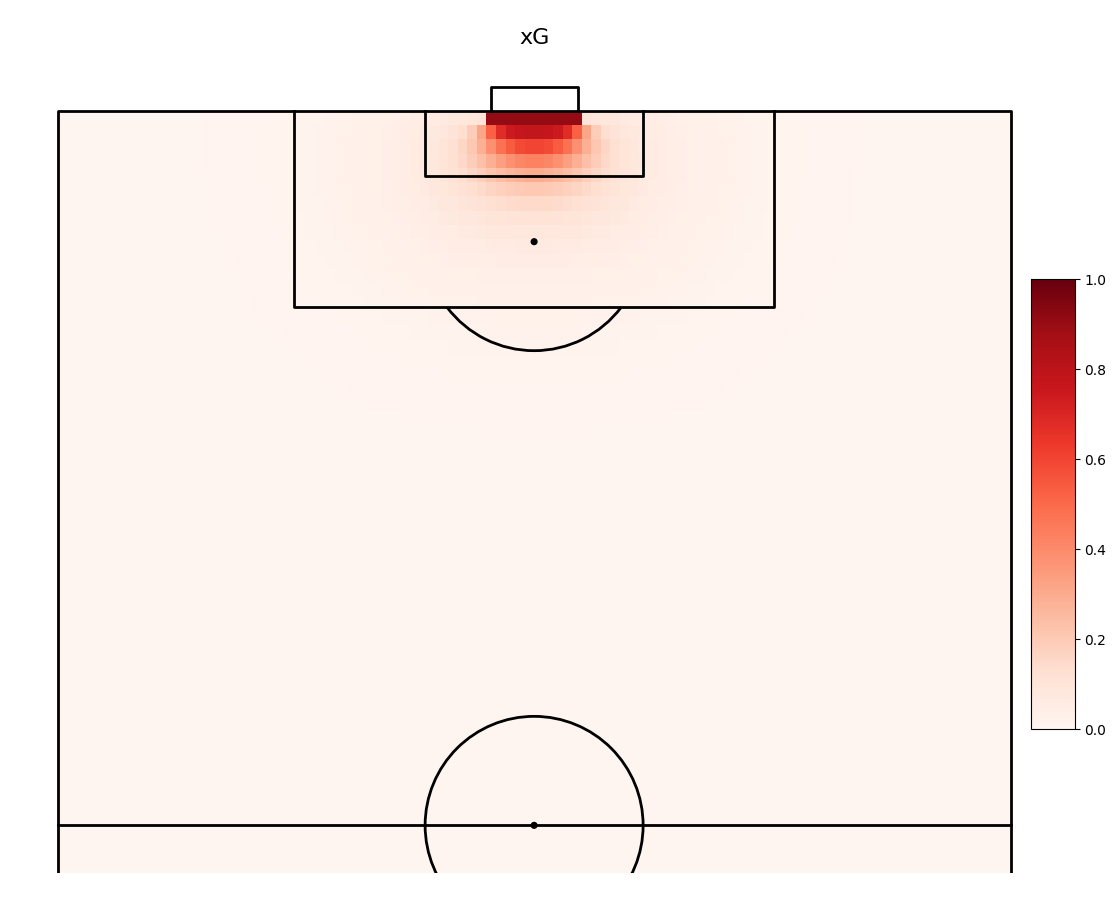

In [22]:
pitch = VerticalPitch(line_color='black', pitch_type='custom',half=True, pitch_length=120, pitch_width=80, line_zorder = 4,goal_type='box',
    goal_alpha=1)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

model_bin_stat = pitch.bin_statistic(df_xG['x'], df_xG['y'], values=df_xG['xG'], statistic='mean', bins=100)
pcm_model = pitch.heatmap(model_bin_stat, ax=ax["pitch"], cmap='Reds', edgecolor='white', linewidth = 0,vmin = 0, vmax = 1)

ax_cbar = fig.add_axes((0.95, 0.2, 0.04, 0.5))
cbar = plt.colorbar(pcm_model, cax=ax_cbar)

plt.suptitle('xG', color='black', fontsize=16)
plt.show()

c:\Users\ADAM\scoop\apps\python\3.12.4\Lib\site-packages\mplsoccer\_pitch_plot.py:167: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


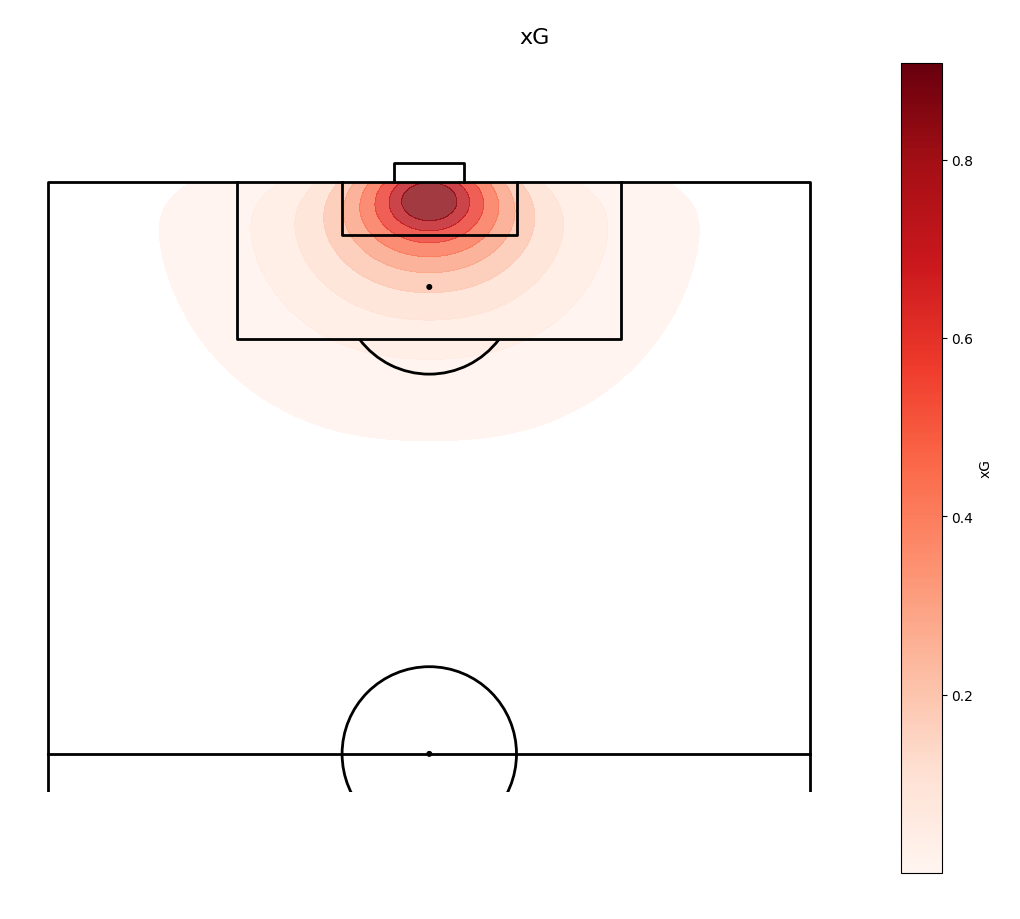

In [20]:
pitch = VerticalPitch(line_color='black', pitch_type='custom', half=True, pitch_length=120, pitch_width=80,
                      line_zorder=4, goal_type='box', goal_alpha=1)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False, endnote_height=0.04, title_space=0, endnote_space=0)

pitch.kdeplot(
    x=df_xG['x'], 
    y=df_xG['y'], 
    weights=df_xG['xG'], 
    ax=ax["pitch"], 
    cmap='Reds', 
    shade=True,  
    levels=10,  
    alpha=0.8    
)

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=df_xG['xG'].min(), vmax=df_xG['xG'].max()))
sm.set_array([]) 

fig.colorbar(sm, ax=ax["pitch"], label='xG')

plt.suptitle('xG', color='black', fontsize=16)

plt.show()


In [7]:
from joblib import dump
dump(model, 'xG_head.joblib')

['xG_head.joblib']